In [25]:
print('Hello, world!')

Hello, world!


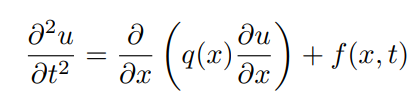

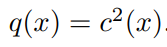

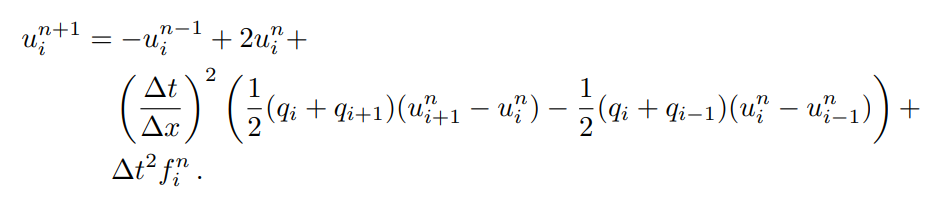

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [27]:
c0 = 10.0
c1 = 5.0
dx = 0.02
dt = 0.0005
t_end = 7.0
L = 50.0
x = np.linspace(0., L, int(L/dx) + 1)
t = np.linspace(0., t_end, int(t_end/dt) + 1)
l_b = int(0.7*len(x))
l_e = int(0.9*len(x))
c = np.ones_like(x)*c1
c[l_b:l_e] = c0

cmax = np.max(c)*dt/dx
print("courant = ", cmax)

q = c**2
C2 = (dt/dx)**2
print('x.shape = ', x.shape)
print('t.shape = ', t.shape)
print('c.shape = ', c.shape)

courant =  0.25
x.shape =  (2501,)
t.shape =  (14001,)
c.shape =  (2501,)


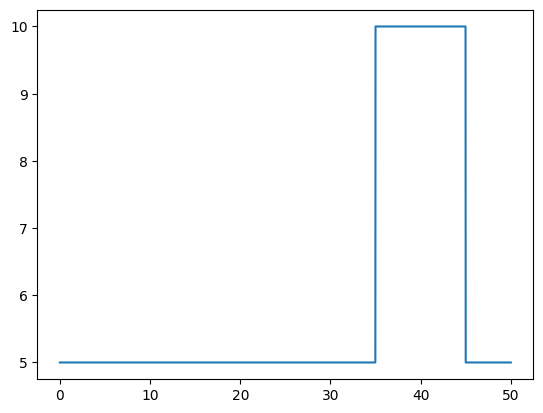

In [28]:
plt.plot(x, c)
plt.show()

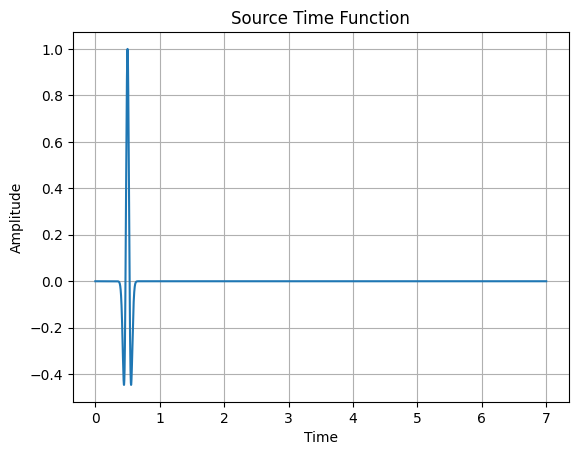

In [29]:
def mexican_hat_freq(tt, t0, f0, amp=1.0):
    sigma = 1.0/(2*np.pi*f0)
    r = (tt - t0)/sigma
    return amp*(1 - r**2)*np.exp(-0.5*r**2)

src_p = 1250
f0 = 5.0
f = np.zeros_like(t)
f[50:2000] = mexican_hat_freq(t[50:2000], t[1000], f0, amp=1.0)

u_prev = np.zeros_like(x)
u_curr = np.zeros_like(x)
u_next = np.zeros_like(x)

all_u_s = []

plt.plot(t, f)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Source Time Function')
plt.grid()
plt.show()

In [30]:
all_u_s = []
u_prev = np.zeros_like(x)
u_curr = np.zeros_like(x)

for n in tqdm(range(1, len(t))):
    u_next = np.zeros_like(x)
    u_next[1:-1] = -u_prev[1:-1] + 2.0*u_curr[1:-1]+ C2*( 0.5*(q[1:-1]+q[2:])  *(u_curr[2:]   - u_curr[1:-1])-0.5*(q[1:-1]+q[0:-2])*(u_curr[1:-1] - u_curr[0:-2]) )
    u_next[0] = -u_prev[0] + 2.0*u_curr[0]+ C2 * ( (q[0]+q[1]) * (u_curr[1] - u_curr[0]) )
    u_next[-1] = -u_prev[-1] + 2.0*u_curr[-1]+ C2 * ( (q[-1]+q[-2]) * (u_curr[-2] - u_curr[-1]) )
    u_next[src_p] += dt*dt*f[n]

    u_prev, u_curr = u_curr, u_next
    all_u_s.append(u_curr.copy())

100%|██████████| 14000/14000 [00:00<00:00, 22766.84it/s]


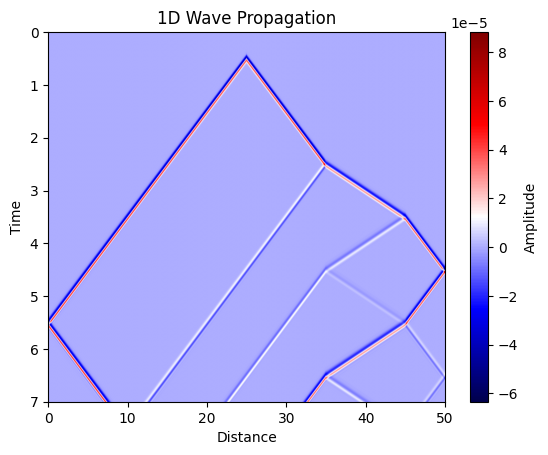

In [31]:
all_u = np.array(all_u_s)
plt.imshow(all_u, aspect='auto', extent=[x[0], x[-1], t[-1], t[0]], cmap='seismic')
plt.colorbar(label='Amplitude')
plt.xlabel('Distance')
plt.ylabel('Time')
plt.title('1D Wave Propagation')
plt.show()

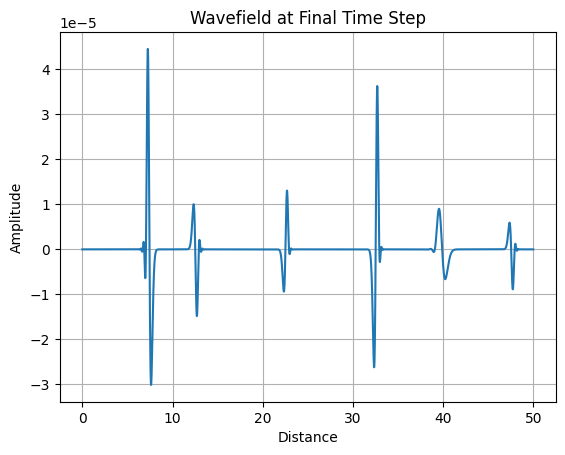

In [32]:
plt.plot(x, u_curr)
plt.xlabel('Distance') 
plt.ylabel('Amplitude')
plt.title('Wavefield at Final Time Step')
plt.grid()
plt.show()

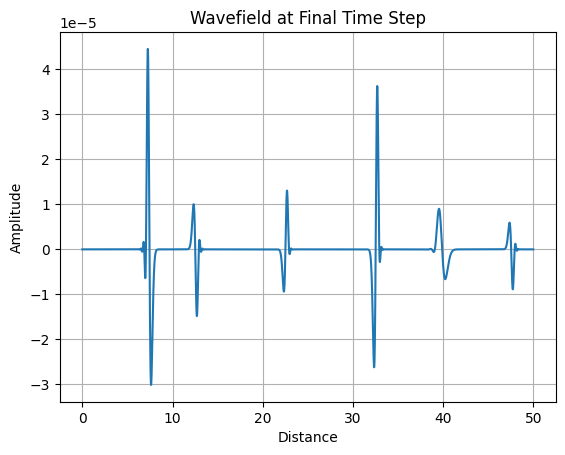

In [33]:
plt.plot(x, u_curr)
plt.xlabel('Distance') 
plt.ylabel('Amplitude')
plt.title('Wavefield at Final Time Step')
plt.grid()
plt.show()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def make_sampled_wave_gif(all_u_s, x=None, fps=20, outfile="wave_sampled.gif",
                          ylim="auto", dpi=120, n_frames=200):
    """
    Sample ~n_frames evenly from all_u_s and save as GIF.

    Parameters
    ----------
    all_u_s : list[np.ndarray]
        Time history of wave, each element shape (N,).
    x : np.ndarray | None
        Spatial coordinates, defaults to np.arange(N).
    fps : int
        Frames per second.
    outfile : str
        Output GIF filename.
    ylim : "auto" or (min,max)
        y-limits.
    dpi : int
        Resolution for output.
    n_frames : int
        Number of frames to sample.
    """
    assert len(all_u_s) > 0, "all_u_s is empty."
    N = all_u_s[0].shape[0]
    if x is None:
        x = np.arange(N)

    # choose ~n_frames evenly spaced indices
    idxs = np.linspace(0, len(all_u_s)-1, n_frames, dtype=int)
    frames = [all_u_s[i] for i in idxs]

    # auto y-limits
    if ylim == "auto":
        y_min = min(np.min(f) for f in frames)
        y_max = max(np.max(f) for f in frames)
        pad = 0.05 * max(1e-12, (y_max - y_min))
        ylim = (y_min - pad, y_max + pad)

    fig, ax = plt.subplots()
    line, = ax.plot(x, frames[0])
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(*ylim)
    ax.set_xlabel("x")
    ax.set_ylabel("u(x,t)")
    title = ax.set_title("Time step 0")

    def update(k):
        line.set_ydata(frames[k])
        title.set_text(f"Frame {k} (original step {idxs[k]})")
        return line, title

    ani = animation.FuncAnimation(fig, update, frames=len(frames), blit=True)
    ani.save(outfile, writer="pillow", fps=fps, dpi=dpi)
    plt.close(fig)
    return outfile

# --- Usage ---
gif_path = make_sampled_wave_gif(all_u_s, x=x, fps=15, outfile="wave_v_v.gif", n_frames=200)
print("Saved:", gif_path)


Saved: wave_v_v.gif
